In [1]:
%matplotlib inline

import os
import pandas as pd
import sys
import logging

## modules
sys.path.insert(0, './_modules')
from QRCode_module import decode
from scanner_module import scanner
from regex_module import FindEmail, FindNumbersBraket, FindLawsuit
from general_functions import DateConv
from Gmail_module import GetAttachments_v2, GetMessage_v2, ListMessagesMatchingQuery, GetBody,\
                         FDS, PrintMail, GetCredentials, MailData, GetBody_v2
from datetime import datetime
from datetime import timedelta
import random
import numpy as np
import time
import matplotlib.pyplot as plt


plt.style.use('ggplot')

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Credentials ok!
Credentials not ok! Asking for one...


In [2]:
cwd = os.getcwd()
print(cwd)

## specifying the path to database:
attachments_path = os.path.join(cwd, '_attachments')
print(attachments_path)
if os.path.isdir(attachments_path) == False:
    os.mkdir(attachments_path)
    print('Folder created!')
else:
    print('Folder already exists!')

/home/leandro/Desktop/Dropbox/sigo
/home/leandro/Desktop/Dropbox/sigo/_attachments
Folder already exists!


In [6]:
## specifying the path to collect control:
control_path = os.path.join(cwd, '_collect_control')
print(control_path)
if os.path.isdir(control_path) == False:
    os.mkdir(control_path)
    print('Folder created!')
else:
    print('Folder already exists!')

/home/leandro/Desktop/github_reps/sigo/_collect_control
Folder already exists!


In [28]:
new_query = True

file_path = os.path.join(control_path, 'mid_base.csv')
if new_query == True:

    ## query second way:
    ## yyyy-mm-dd format or yyyy/mm/dd 
    start_time2 = (datetime.today()).strftime('%Y-%m-%d')
    end_time2 = (datetime.today() + timedelta(days=1)).strftime('%Y-%m-%d')

    mail_list = ListMessagesMatchingQuery(query='after:{} before:{}'.format(start_time2, end_time2))
    print(len(mail_list))


    ## saving to a dataframe
    df_mid = pd.DataFrame(mail_list)
    df_mid['after'] = start_time2
    df_mid['before'] = end_time2

    
    if os.path.exists(file_path) == True:
        with open(file_path, 'a') as f:
            df_mid.to_csv(f, header=False, sep ='\t', encoding='utf-8', index=False)
    else:
        df_mid.to_csv(file_path, sep ='\t', encoding='utf-8',index=False)
        
        
      
        

df_mid = pd.read_csv(file_path, sep = '\t', encoding = 'utf-8')
df_mid = df_mid.drop_duplicates(subset = ['id']).reset_index(drop = True)
df_mid.to_csv(file_path, sep = '\t', encoding = 'utf-8', index = False)
print(len(df_mid))

all_mid_list = list(set(df_mid['id'].tolist()))
print(len(all_mid_list))

2020-02-21 19:24:38,694 : INFO : URL being requested: GET https://www.googleapis.com/gmail/v1/users/me/messages?q=after%3A2020-02-21+before%3A2020-02-22&alt=json


88
12599
12599


In [29]:
## checking if there is mail to be collected
collected_file = os.path.join(control_path, 'mail_data.csv')
if os.path.exists(collected_file):
    df_collected = pd.read_csv(os.path.join(control_path, 'mail_data.csv'), sep = '\t', encoding = 'utf-8')
    collected_list = list(set(df_collected['mail_id'].tolist()))
    
else:
    collected_list = []


mail_list = list(set(all_mid_list) - set(collected_list))
print(len(mail_list))

nparts = 100
if len(mail_list) >= nparts:
    splitted_mail_list = np.array_split(mail_list, nparts)
else:
    nparts = 1
    splitted_mail_list = [mail_list.copy()]


1


In [30]:
counter = 0
time_list = []
global_start_time = time.time()
for subset_mail_list in splitted_mail_list:
    start_time = time.time()
    print('>>> Subset {}'.format(counter+1))
    
    
    df, df_attachments, df_to = FDS(subset_mail_list, attachments_path)


    ## saving data
    file_path = os.path.join(control_path, 'mail_data.csv')
    att_path = os.path.join(control_path, 'att_data.csv')
    destinatary_path = os.path.join(control_path, 'to_data.csv')
    if os.path.exists(file_path) == True:
        with open(file_path, 'a') as f:
            df.to_csv(f, header = False, sep ='\t', encoding = 'utf-8', index=False)

        with open(att_path, 'a') as f:
            df_attachments.to_csv(f, header = False, sep ='\t', encoding = 'utf-8', index=False)        

        with open(destinatary_path, 'a') as f:
            df_to.to_csv(f, header = False, sep ='\t', encoding = 'utf-8', index=False)           

    else:
        df.to_csv(file_path, sep ='\t', encoding = 'utf-8',index=False)
        df_attachments.to_csv(att_path, sep ='\t', encoding = 'utf-8', index=False)
        df_to.to_csv(destinatary_path, sep ='\t', encoding = 'utf-8', index=False)
        
        
    print(' ')
    print(' ')
    counter += 1
    time.sleep(5)
    
    dt = time.time() - start_time
    time_list.append(dt)
    forecasting = np.mean(time_list)*nparts
    
    print('Total time elapsed: {}'.format(time.time() - global_start_time))
    print('Step time: {}'.format(dt))
    print('Forecasting: {}'.format(forecasting))
    print(' ')
    print('>>>>>>>>>>>>>>')
    print(' ')
    print(' ')
    
    

2020-02-21 19:24:42,791 : INFO : URL being requested: GET https://www.googleapis.com/gmail/v1/users/me/messages/17069d61a57db1bd?alt=json


>>> Subset 1


2020-02-21 19:24:43,338 : INFO : URL being requested: GET https://www.googleapis.com/gmail/v1/users/me/messages/17069d61a57db1bd/attachments/ANGjdJ91v7lMx-SP2QMu_slleBHFjS9bdyk-2xzYMZO8JL_HYujlkethXBpHav7HkgJcNuzWcDeqmYVo3md2xB3lrCl43h5UAOCyw3ZfU233H1GxZBCg-heZHX7P6sNzd1QddL_sRIuYA8vDH8epk1LOve-nHffiW4TM9ZXLN2ERLp8kHtEGA8m3lEeCQtdZ7QWty3e_alCWuoulZTWjPKsli81PVCppQCaQvdudJjwKFWut5zfEhAK--l2rqoXsK5ikmQd4N5kLPAXZn9KZqwUinUN33ii9cEfjMM1ZMd-ldB_HHtkJGu1xCWdA0ENMJZTY-tma6_IIJlwYJ6_WxCKdaFfvPqnQe5xJ0okkKAMyNjJIlZiVjdXnoJtriI5HPE-KOmGzWzcdjzOgcD99?alt=json


17069d61a57db1bd
Date: Fri, 21 Feb 2020 22:20:03 +0000
Subject: FWD: [1-1681000029125] BR Data Request: 202000114029
From: lis-latam@google.com
 
 


2020-02-21 19:24:45,350 : INFO : URL being requested: GET https://www.googleapis.com/gmail/v1/users/me/messages/17069d61a57db1bd/attachments/ANGjdJ_bTc5zr1cWaNoudW8GAjziOazRd9d56-x0Z2wvQ4w-sACuymTXt2TYtR2AD08BWHQ1CNfKoRAJE3ituP0pa-j4ia2PwjwgvnZW8j5GPl0YLsg-wJguhUQzutPrgw5QdNALOZ8IhyEogyJQKiNvCh06s2MUikzTHbZ63J-MsH45sbCHM0_Dp6Ta1N06Uptgt52giqUP_5_nRHBrGyvVC2tNTNO7S86VnqPbEj1hSdrn3HQv-aEAnOxHUEygZh3VAApSjsnqynGRml5m5TlQxIfKaSkANYMUK1Q_4F19oyMgDGf71-FSxdUQN3X5hXbDkHlo2i7AbIo30DzUO6H0d9eqvh8IKiBIbaQ27sWuPR5yQJzU26lugbdIt3LzPZBIpaxszQddJmHcAuUz?alt=json


 
 
Total time elapsed: 8.827556133270264
Step time: 8.82709527015686
Forecasting: 8.82709527015686
 
>>>>>>>>>>>>>>
 
 


In [55]:
df = pd.read_csv(file_path, sep ='\t', encoding = 'utf-8')

In [57]:
df

,mail_id,thread_id,mail_date_received_full,mail_from,mail_subject,mail_body,mail_body_snippet,has_attachment,mail_date_received,mail_hms_received,case_id,external_ref_number
0,16f33f733ab079ab,16f33f733ab079ab,2019-12-23 18:13:55+00:00,lis-latam@google.com,FWD: [2-7133000028568] Número de referência Go...,"\r\n\r\n*IMEI Phase 2*\r\n\r\nHi team,\r\n\r\n...","IMEI Phase 2 Hi team, Please see below the req...",1,2019-12-23,18:13:55+00:00,2-7133000028568,NaN
1,16d3a11e5a5f9662,16cfe43584bb757c,2019-09-16 12:35:09+00:00,denise.comim@carinaquito.com,RES: Diligência - Delegacia Municipal de Políc...,Prezado Paulo!\r\n\r\nBom dia!\r\n\r\n \r\n\r\...,Prezado Paulo! Bom dia! A correspondência já e...,0,2019-09-16,12:35:09+00:00,NaN,NaN
2,16c30235acd54756,16c30235acd54756,2019-07-26 21:15:14+00:00,helena.rossi@carinaquito.com,[5-9020000027280] - c 2019/08/05 - August 5th....,Last Name: Vara Criminal e Tribunal do Júri do...,Last Name: Vara Criminal e Tribunal do Júri do...,1,2019-07-26,21:15:14+00:00,5-9020000027280,0001411-94.2019.8.07.0017
3,16dbcac27cc628f7,16dbcac27cc628f7,2019-10-11 21:14:19+00:00,lis-latam@google.com,FWD: [8-0398000028405] BR Data Request: 2019.0...,"\r\n\r\nDate received via LERS: Oct 11, 2019\r...","Date received via LERS: Oct 11, 2019 LERS refe...",1,2019-10-11,21:14:19+00:00,8-0398000028405,NaN
4,16fc979cdaa99f12,16fc979cdaa99f12,2020-01-21 18:59:59+00:00,lis-latam@google.com,FWD: [0-7962000029697] Fwd: A produção relacio...,\r\nLE Follow-up / Urgent - 5 day deadline / F...,LE Follow-up / Urgent - 5 day deadline / Fines...,0,2020-01-21,18:59:59+00:00,0-7962000029697,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12432,16fa679df646b207,16fa679df646b207,2020-01-14 23:53:15+00:00,mohamad.fares@carinaquito.com,[3-1122000029358] - PETITION - URGENT - 48 HOU...,*Last Name: *Vara Única da Comarca de Japaratu...,Last Name: Vara Única da Comarca de Japaratuba...,1,2020-01-14,23:53:15,3-1122000029358,NaN
12433,16e85e6a8fe65e9d,16e85e6a8fe65e9d,2019-11-19 23:01:55+00:00,lis-latam@google.com,FWD: [5-9720000028439] [BRA] - [Official Lette...,"\r\n\r\nHi team,\r\n\r\nPlease see below the r...","Hi team, Please see below the request LIS rece...",1,2019-11-19,23:01:55,5-9720000028439,NaN
12434,16c2050bbb602dd6,16c06a0f3173954a,2019-07-23 19:30:45+00:00,rvmartoni@gmail.com,Re: Diligência - Delegacia de Polícia Federal ...,"Prezados, boa tarde!\r\n\r\nSegue fotocópia d...","Prezados, boa tarde! Segue fotocópia do protoc...",1,2019-07-23,19:30:45,NaN,NaN
12435,16e61f90147761cc,16e61f90147761cc,2019-11-12 23:35:05+00:00,rafael.kohl@carinaquito.com,[2-2467000028182] - URGENT 24 HOURS - OVERDUE ...,Last Name: Tribunal Regional Eleitoral do Rio ...,Last Name: Tribunal Regional Eleitoral do Rio ...,1,2019-11-12,23:35:05,2-2467000028182,7-37.2019.6.21.0000


In [14]:
df_ex = df[df['external_ref_number'].isnull() == False].reset_index(drop = True)

In [15]:
df_ex.head()

,mail_id,thread_id,mail_date_received_full,mail_from,mail_subject,mail_body,mail_body_snippet,has_attachment,mail_date_received,mail_hms_received,case_id,external_ref_number
0,16c30235acd54756,16c30235acd54756,2019-07-26 21:15:14+00:00,helena.rossi@carinaquito.com,[5-9020000027280] - c 2019/08/05 - August 5th....,Last Name: Vara Criminal e Tribunal do Júri do...,Last Name: Vara Criminal e Tribunal do Júri do...,1,2019-07-26,21:15:14+00:00,5-9020000027280,0001411-94.2019.8.07.0017
1,16e040528960dc95,16e040528960dc95,2019-10-25 17:44:33+00:00,lis-latam@google.com,FWD: [2-3751000028148] BR Data Request 0002243...,"\r\n\r\nDate received via LERS: October 25, 20...","Date received via LERS: October 25, 2019 LERS ...",1,2019-10-25,17:44:33+00:00,2-3751000028148,0002243-35.2019.8.24.0024
2,16df04a851932037,16df04a851932037,2019-10-21 21:47:48+00:00,mohamad.fares@carinaquito.com,[6-4243000028547] - PETITION - c 2019/10/22 - ...,Last Name: Vara Única da Comarca de Catanduvas...,Last Name: Vara Única da Comarca de Catanduvas...,1,2019-10-21,21:47:48+00:00,6-4243000028547,0001125-24.2019.8.24.0218
3,1700d96dabd4c6a2,1700c87c9c94877b,2020-02-04 00:25:54+00:00,lis-latam@google.com,Re: [3-7478000029339] - c 2020/02/07 - Februar...,"\r\n\r\nHi all,\r\n\r\nAttached the response l...","Hi all, Attached the response letter for this ...",1,2020-02-04,00:25:54+00:00,3-7478000029339,0004824-30.2018.8.21.0157
4,16e5c4e1f1f95d1f,16e4b82112b242c0,2019-11-11 21:10:47+00:00,mohamad.fares@carinaquito.com,RES: [4-0507000028206] - BR Data Request 00034...,"Hi LIS,\r\n\r\n \r\n\r\nPlease notice that thi...","Hi LIS, Please notice that this case is relate...",1,2019-11-11,21:10:47+00:00,4-0507000028206,0003499-51.2019.8.21.0006


In [18]:
df_ex_group = df_ex.groupby('external_ref_number')['mail_id'].apply(list).to_frame().reset_index()
df_ex_group.columns = ['external_ref_number', 'mail_list']
df_ex_group['mail_counting'] = df_ex_group['mail_list'].apply(len)

In [19]:
df_ex_group

,external_ref_number,mail_list,mail_counting
0,0000013-73.2020.8.22.0013,"[16ff2850ebdc10c1, 16fcf7d0017aff53, 16fd4aa22...",3
1,0000026-39.2018.7.01.0101,"[16ea8edbff9dee10, 16ef13b811e30c7f, 16e905426...",3
2,0000032-32.2020.8.21.0070,"[1705563ce475e55b, 17053db8f407985f, 17043cb82...",3
3,0000032-73.2019.8.26.0346,[16c0c64a12498de8],1
4,0000036-20.2020.8.13.0611,"[17036c3c0ff7afd0, 17040cbf2a62a6cb, 1703017cc...",3
...,...,...,...
1559,9047-14.2019.8.16.0130,"[16dfe3321102e440, 16dd6d6cfcb276af, 16d98fba3...",7
1560,9366-80.2019.811,"[16e1468bfa9fa0e2, 16dcc777e720da27]",2
1561,9586-35.2014.4.01.3200,[16da74fe3f26ba86],1
1562,9586-35.2019.4.01.3200,"[16dd6d3887236dc8, 16ea47774815e814, 16ff85089...",6


In [22]:
df_ex_group['mail_counting'].describe()

count    1564.000000
mean        3.597187
std         3.430344
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        35.000000
Name: mail_counting, dtype: float64

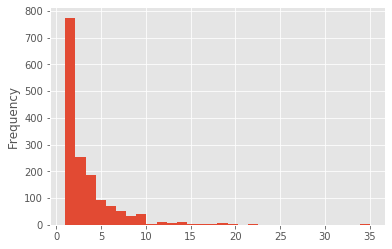

In [25]:
df_ex_group['mail_counting'].plot.hist(bins = 30)

In [39]:
test_mail_list = df_ex_group['mail_list'][15]
PrintMail(test_mail_list, df, full = True)

16ffd4a74639d463
FWD: [3-0595000029098] Oficio judicial 0000125-58.2020.8.26.0586 - afastamento do sigilo telemático - Delpol São Roque
2020-01-31
lis-latam@google.com
-----------


Hi team,

Please see below the request LIS received. We kindly ask that when you send
this back to us with your interpretation, that you keep the message on this
same thread, so we can easily monitor the case.

Records #[0000125-58.2020.8.26.0586]

Regards, LIS



On Fri, Jan 31, 2020 at 18:55 UTC "MARCO ANTONIO ROSSINI ARMANDO" <
marco.armando@policiacivil.sp.gov.br> wrote:

Ilustríssimo(a) Senhor(a),



Sirvo-me do presente para encaminhar a Vossa Senhoria o oficio
judicial 0000125-58.2020.8.26.0586, expedido pela 1ª Vara Criminal da
Comarca de São Roque/SP, autorizando  o afastamento do sigilo telemático da
conta Google vinculada ao número telefone (19) 9xxxxxx, IMEI: 355xxx773,
conta xxxxxxx


Em razão da necessidade de celeridade, solicito que os dados sejam enviados
a esta Unidade Policial por intermé

In [42]:
df_case_group = df.groupby('case_id')['mail_id'].apply(list).to_frame().reset_index()
df_case_group.columns = ['case_id', 'mail_list']
df_case_group['mail_counting'] = df_case_group['mail_list'].apply(len)

In [43]:
df_case_group

,case_id,mail_list,mail_counting
0,0-0027000028709,"[16f6cdb6e830fc91, 16fb5beea0adb1ac, 16f823855...",3
1,0-0140000027614,"[16cf67b78156fe88, 16cf67cb04ca6ce8, 16cfe7abd...",3
2,0-0160000027608,"[16d6aa92c5a576f5, 16dcc9d9584f38e2, 16d63f2f9...",3
3,0-0191000027522,"[16d459498d81d399, 16d503191ed90d35]",2
4,0-0196000028985,"[16fce5e753f8f4f0, 16fd2dfd8148bfb9]",2
...,...,...,...
2799,9-9867000028476,"[16e8fbf0aa6fa32d, 16e95625c6d2d0e4, 16ecc9db4...",3
2800,9-9896000027544,"[16d6aba7eff5f30d, 16d21df5b0a07fc5, 16d27983f...",3
2801,9-9903000029263,"[1700c69239c4b4d8, 17010fbd0e802be3, 17020707e...",3
2802,9-9939000027087,[16c07025f4c6b414],1


In [44]:
df_case_group['mail_counting'].describe()

count    2804.000000
mean        3.087732
std         1.720002
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        19.000000
Name: mail_counting, dtype: float64

In [25]:
mail_dict = {}
for k in range(0, len(df_attachments)):
    print(k)
    try:
        pages_list = scanner(df_attachments['doc_link'][k])

        data_list = []
        for page in pages_list:
            if page != '':
                lawsuit_list = FindLawsuit(page)
                data_list.append(lawsuit_list)

        key = df_attachments['mail_id'][k]
        data_list = [item for item in data_list if item != '']
        
        if len(data_list) != 0:
            mail_dict[key] = list(set(data_list))
    except:
        continue
        
        

    

0
1
2
3
4
5
6
7
8


In [26]:
mail_dict

{'17059766a9e05238': ['0288094-53.2015.8.21.0001', '001/2.15.0093997-6'],
 '17058e34f29299a4': ['03002647-65.2019.805.0113', '0302647-65.2019.805.0113'],
 '1705a2107cd7c898': ['0010400-22.2018.815.0011'],
 '17059a2bed60c66a': ['0042505-36.2012.8.26.0050'],
 '17058bfe7fddbc3c': ['13785-80.2017.8.10.0001']}

In [22]:
df

,mail_id,thread_id,mail_date_received_full,mail_from,mail_subject,mail_body,mail_body_snippet,has_attachment,mail_date_received,mail_hms_received,case_id,external_ref_number
0,170598c74e8d6841,17058f984f6a3aa6,2020-02-18 18:25:35+00:00,denise.comim@carinaquito.com,RES: Diligência - Delegacia Seccional da Políc...,"Prezado Rodrigo,\r\n\r\n\r\n\r\nSegue anexo no...","Prezado Rodrigo, Segue anexo nosso modelo de r...",1,2020-02-18,18:25:35+00:00,,25.098.260-2
1,1705aa8c7ceb6afa,1705aa8c7ceb6afa,2020-02-18 23:36:10+00:00,mohamad.fares@carinaquito.com,[7-7563000029402] - ADAMANTINA - c 2020/02/21 ...,*Last Name: *1ª Vara da Comarca de Adamantina ...,Last Name: 1ª Vara da Comarca de Adamantina - ...,1,2020-02-18,23:36:10+00:00,7-7563000029402,
2,17059766a9e05238,17059766a9e05238,2020-02-18 18:01:36+00:00,lis-latam@google.com,FWD: [1-1439000029681] BR Data Request 1648/20...,\r\n\r\nUrgent - Fines\r\n\r\nRecords # [1648/...,Urgent - Fines Records # [1648/2015/750310] Da...,1,2020-02-18,18:01:36+00:00,1-1439000029681,
3,170596d315712cfa,17015e8b92b2d303,2020-02-18 17:51:32+00:00,lis-latam@google.com,Re: RES: [6-3696000028666] BR Data Request IP ...,"Hi all,\r\n\r\nAttached the response letter fo...","Hi all, Attached the response letter for this ...",1,2020-02-18,17:51:32+00:00,6-3696000028666,0014194-07.2019.8.22.0501
4,17058e34f29299a4,17058e34f29299a4,2020-02-18 15:20:55+00:00,lis-latam@google.com,FWD: [4-8278000029988] SOLICITAÇÃO DE QUEBRA D...,"*Urgent - 5 Days / Fines*\r\n\r\nHi team,\r\n\...","Urgent - 5 Days / Fines Hi team, Please see be...",1,2020-02-18,15:20:55+00:00,4-8278000029988,0302647-65.2019.805.0113
5,17059d66d74b2952,17059d66d74b2952,2020-02-18 19:46:28+00:00,mohamad.fares@carinaquito.com,RES: [3-0521000029342] - FINES - c 2020/02/26 ...,"Hi LIS,\r\n\r\n\r\n\r\nPlease note that this c...","Hi LIS, Please note that this case is related ...",0,2020-02-18,19:46:28+00:00,3-0521000029342,0000581-05.2020.8.14.0501
6,1705a2107cd7c898,17054d50a3660f08,2020-02-18 21:07:58+00:00,lis-latam@google.com,Re: RES: [7-1993000029476] Confirmação de ofíc...,"\r\n\r\nHi all,\r\n\r\n\r\nAttached the respon...","Hi all, Attached the response letter for this ...",1,2020-02-18,21:07:58+00:00,7-1993000029476,0010400-22.2018.815.0011
7,170596c1dee073e9,170596c1dee073e9,2020-02-18 17:50:20+00:00,mohamad.fares@carinaquito.com,RES: [7-5992000029301] - (IMEI 2nd Phase) - c ...,"Hi LIS,\r\n\r\n\r\n\r\nPlease note that this c...","Hi LIS, Please note that this case is related ...",1,2020-02-18,17:50:20+00:00,7-5992000029301,
8,17059a2bed60c66a,17058f984f6a3aa6,2020-02-18 18:49:57+00:00,rodrigocruz.adv@gmail.com,RES: Diligência - Delegacia Seccional da Políc...,Dra. Denise segue anexo o recibo enviado anter...,Dra. Denise segue anexo o recibo enviado anter...,1,2020-02-18,18:49:57+00:00,,25.098.260-2
9,17058bfe7fddbc3c,17045d03354cd7c1,2020-02-18 14:42:15+00:00,lis-latam@google.com,Re: [4-5652000029666] - LEGAL ISSUE - URGENT 2...,"\r\n\r\nHi all,\r\n\r\n\r\nAttached the respon...","Hi all, Attached the response letter for this ...",1,2020-02-18,14:42:15+00:00,4-5652000029666,13785-80.2017.8.10.0001


In [30]:
df[df['mail_id'] == list(mail_dict.keys())[0]]

,mail_id,thread_id,mail_date_received_full,mail_from,mail_subject,mail_body,mail_body_snippet,has_attachment,mail_date_received,mail_hms_received,case_id,external_ref_number
2,17059766a9e05238,17059766a9e05238,2020-02-18 18:01:36+00:00,lis-latam@google.com,FWD: [1-1439000029681] BR Data Request 1648/20...,\r\n\r\nUrgent - Fines\r\n\r\nRecords # [1648/...,Urgent - Fines Records # [1648/2015/750310] Da...,1,2020-02-18,18:01:36+00:00,1-1439000029681,


In [29]:
df['mail_id'][7]

'17059a2bed60c66a'

In [18]:
df_attachments[df_attachments['mail_id'] == df['mail_id'][7]]['doc_link'][5]

'/home/leandro/Desktop/github_reps/sigo/_attachments/17059a2bed60c66a/Documento 18-02-2020 14.41.51 - Adicionar Pessoas 66.pdf'

In [19]:
test_path = os.path.join(attachments_path, df['mail_id'][7])

In [20]:
os.listdir(test_path)

['Documento 18-02-2020 14.41.51 - Adicionar Pessoas 66.pdf']

In [21]:
os.path.join(test_path, 'Documento 18-02-2020 14.41.51 - Adicionar Pessoas 66.pdf')

'/home/leandro/Desktop/github_reps/sigo/_attachments/17059a2bed60c66a/Documento 18-02-2020 14.41.51 - Adicionar Pessoas 66.pdf'

In [23]:
results_scanner = scanner(os.path.join(test_path, 'Documento 18-02-2020 14.41.51 - Adicionar Pessoas 66.pdf'))

In [25]:
print(results_scanner[0])

Recibo

Recebido por: Quito Sociedade de Advogados
CNPJ 32.222.588/0001-14

 

  

  

Carta Precatéria 031/2020
Inquérito Policial n° 0042505-36.2012.8.26.0050
Local da dillgéncia: Delegacia Seccional da Policia Civil de Aragatuba/SP

 
   

Descrigao da diligéncla
Diligencia para extracao de copias da Carta Precatéria 031/2020 e protocolo de peticao.

 

 

Valor

Honorarios — RS 80,00 (oitenta reais)
( ) Correios — RS

( ) Pedagio —- RS

( ) Quilometragem — R$

(_) Copias RS -

Total: RS 80,00

*Anexar comprovantes de despesas

  
 

 

 
    
      
 
     

Dados Bancarlos

Banco: Banco do Brasil

Agéncia: 5599-9

C/C: 5171-3

Favorecido: Rodrigo Fernando Cruz
CPF: 218.778.878-46

 

 

 

 

*A validade do presente recibo fica condicionada ao respectivo depdsito bancarlo.

Aracatuba, 18 de feveTeiro de 2020.
